### Importing libraries

In [31]:
import math                           # allows the use of basic mathematical functions
import calendar                       # useful library if you want to do some basic calendar manipulations (selecting specific days for example)
import numpy as np                    # useful library to use for array manipulation
import matplotlib.pyplot as plt       # used to make plots in python
import matplotlib.dates as mdates     # used to work with dates in our figures
import pandas as pd                   # easy to use data manipulation library (also easiest way to read in standard data)
import seaborn as sns                 # use seaborn style defaults 
import cartopy                        # cartopy is the library that enables us to plot world/regional maps
import cartopy.crs as ccrs            # selecting the Cartopy Coordinate Reference Systems (projection of the map)
import cartopy.feature as cfeature    # adding features to the map

#set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
%matplotlib inline

### Reading in the AQ data
I have used the following webpage to download the PM2.5 data for Reading, UK in 2017:
https://discomap.eea.europa.eu/map/fme/AirQualityExport.htm

This website has a very large number of Air Quality data for Europe that you can download, so have a look at any field you would like to investigate. 

I have stored my downloaded data in a folder called ~/AQ_data/pm25/GB_6001_22276_2017_timeseries.csv
In order for the code to work, you will have to change the line below to direct you to the folder that contains the datafile on your computer.

In [32]:
df = pd.read_csv('PM25/GB_6001_22276_2017_timeseries.csv')    # using pandas to read in the csv datafile (we call it df)
PM25_data=np.array(df)                                                  # make a numpy array (easier to work with the data)

We have now downloaded the timeseries. Before we go ahead and plot data, let's first have a look at the structure of the array that we now have created: 

In [33]:
print (np.shape(PM25_data))      # np.shape is a function from the numpy library that calculates the dimension of the array

(8758, 17)


Looking at the values above we see that the array has two dimensions (8758 and 17). To help you interpret these numbers, imagine that the array is a large chest of drawers, where the first number (8758) represents the number of drawers (dimension) from top to botom (rows) and the second number (17) is the number the drawers from left to right (columns). Each combination of these 2 numbers within this range represent a specific drawer where we have stored a specific value. For example [2,10] is the drawer 11 in row 3 (in python we start counting from 0) and these numbers will help us to identify the location where we have stored our data.

In our AQ datacase, we have 8758 rows, each row represents a specific time (i.e. 365x24=8760 hours per year, so almost a full year of data). In other words, each row of drawers represents the hourly data and each variable is stored in a specific column of our chest of drawers. Let us have a look at the headers of each column, so that we know what data is stored:

In [34]:
print (df.keys())              # this statement prints all the headers of the columns 

Index(['Countrycode', 'Namespace', 'AirQualityNetwork', 'AirQualityStation',
       'AirQualityStationEoICode', 'SamplingPoint', 'SamplingProcess',
       'Sample', 'AirPollutant', 'AirPollutantCode', 'AveragingTime',
       'Concentration', 'UnitOfMeasurement', 'DatetimeBegin', 'DatetimeEnd',
       'Validity', 'Verification'],
      dtype='object')


This shows that many of these variables are not very relevant for us if we want to simply plot the concentration timeseries, as is also evident from printing the first row of data:

In [35]:
print (PM25_data[0])

['GB' 'http://environment.data.gov.uk/air-quality/so' 'GB_Network_1'
 'Station_GB0840A' 'GB0840A' 'GB_SamplingPoint_65096'
 'GB_StationProcess_1107' 'GB_SamplingFeature_1107' 'PM2.5'
 'http://dd.eionet.europa.eu/vocabulary/aq/pollutant/6001' 'hour' nan
 'µg/m3' '2017-01-01 00:00:00 +01:00' '2017-01-01 01:00:00 +01:00' -1 1]


If for example we want to know what is stored in the 11th column we type:

In [36]:
print (PM25_data[0,10]) 

hour


We will now use the relevant columns in the 'df' array ('Concentration' and 'DatetimeBegin') to actually plot the timeseries

## Plotting a timeseries of the AQ data

Now that we know what data we have in our array, we can start plotting the data. Using the pandas dataframe (df), it is relatively easy to get a quick view for the data using the build in 'plot' function:  

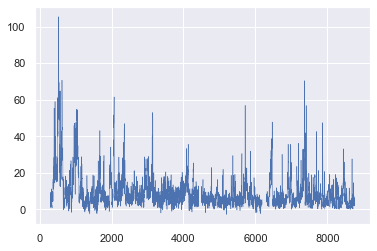

In [37]:
df['Concentration'].plot(linewidth=0.5)           # We plot all the values in the column 'Concentration' from the df array

However this plot does not have any information on what is plotted on the axis, does not look that nice and so we need to work on the plot to make it more presentable. For example we need to add a label to the y-axis and convert the x-axis to represent the time, rather than the index of the row (8758 timesteps). To do this, we create a plot using the 'matplotlib' library, as this gives us more freedom.

In [38]:
# first we convert all the dates to a format that can be used to plot the actual dates on a plot:
df['Date']=pd.to_datetime(df['DatetimeBegin'])         # This is the function used to convert the dates and add a column called 'Date'
# Next we reorganise our array to be sorted by date (I include this step in case the dates are not in chronological order)
df = df.set_index('Date')

Now we can plot the data in all kind of different ways and I suggest that you play around with the options to make them the way you like them. For the example below, I plot the PM2.5 concentrations during the first 2 months of 2017. 

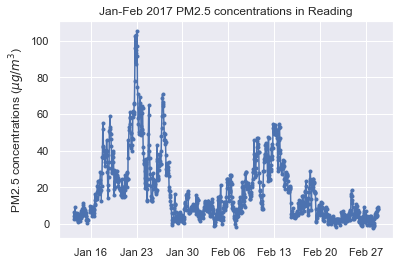

In [39]:
fig, ax = plt.subplots()                     # defining the name of our plot (fig)
# defining what time interval we want to plot, marker type, marker size, color and line style
ax.plot(df.loc['2017-01':'2017-02', 'Concentration'], marker='o', markersize=3, color='b', linestyle='-')     #df.loc can be sued to select specific dates in your dataframe
# set labels and title of plot
ax.set_ylabel('PM2.5 concentrations ($\mu g / m^3$)')
ax.set_title('Jan-Feb 2017 PM2.5 concentrations in Reading')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

## Plotting multiple datasets

Yay, we have succesfully plotted a timeseries of the data with correct axes and a title! Now let's try to add an additional dataset to this figure, so that we can compare the PM2.5 in Reading to a station in London. First we have to import the next datafile (dataset can be found in the same directory as the first dataset)

In [40]:
df2 = pd.read_csv('PM25/GB_6001_22725_2017_timeseries.csv')    # using pandas to read in the second csv datafile (we call it df2)
# Again we convert all the dates to a format that can be used to plot the actual dates on a plot:
df2['Date']=pd.to_datetime(df2['DatetimeBegin'])         # This is the function used to convert the dates and add a column called 'Date'
# Next we reorganise our array to be sorted by date (I include this step in case the dates are not in chronological order)
df2 = df2.set_index('Date')

Now we add one line to the plot we made above to have the second dataset in the figure:

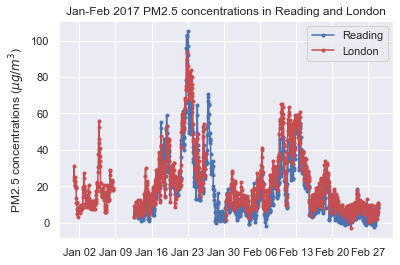

In [41]:
fig, ax = plt.subplots()                     # defining the name of our plot (fig)
# defining what time interval we want to plot, marker type, marker size, color and line style
ax.plot(df.loc['2017-01':'2017-02', 'Concentration'], marker='o', markersize=3, color='b', linestyle='-', label='Reading')     #df.loc can be used to select specific dates in your dataframe
ax.plot(df2.loc['2017-01':'2017-02', 'Concentration'], marker='o', markersize=3, color='r', linestyle='-', label='London')    # ax[1] is the second subplot. So all statements related to your second subplot need this argument.
# set labels and title of plot and add a legend:
ax.set_ylabel('PM2.5 concentrations ($\mu g / m^3$)')
ax.set_title('Jan-Feb 2017 PM2.5 concentrations in Reading and London')
ax.legend()
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

We see that the two datasets show very similar signals during the first two months of 2017, which can make it difficult to interpret the data. Instead, we could also to plot the two datasets underneath to each other. This is done using the following command:

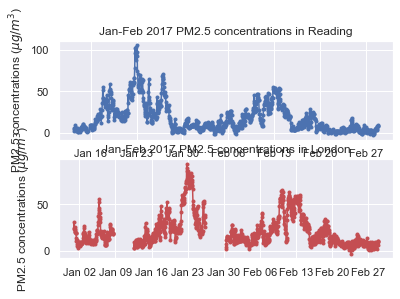

In [42]:
fig, ax = plt.subplots(2,1)                     # defining the name of our plot (fig) and the numerb of subplots (in this case 2 plots in the vertical and 1 horizontal
# defining what time interval we want to plot, marker type, marker size, color and line style
ax[0].plot(df.loc['2017-01':'2017-02', 'Concentration'], marker='o', markersize=3, color='b', linestyle='-')     #df.loc can be used to select specific dates in your dataframe
ax[1].plot(df2.loc['2017-01':'2017-02', 'Concentration'], marker='o', markersize=3, color='r', linestyle='-')    # ax[1] is the second subplot. So all statements related to your second subplot need this argument.
# set labels and title of plot
ax[0].set_ylabel('PM2.5 concentrations ($\mu g / m^3$)')       #Top plot 
ax[0].set_title('Jan-Feb 2017 PM2.5 concentrations in Reading')
ax[1].set_ylabel('PM2.5 concentrations ($\mu g / m^3$)')       #Bottom plot
ax[1].set_title('Jan-Feb 2017 PM2.5 concentrations in London')
# Set x-axis major ticks to weekly interval, on Mondays
ax[0].xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax[1].xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

Plotting the two figures independently as we have done above, we see that there are several issues:
- First of all the x-axis don't line up (fixed using sharex='all')
- The title of the second plot is accros the x-axis labels of the top plot (replace by one title plot at the top).
- The x-axis labels are too close to each other (we rotate the labels 45 degrees)
- The y-axis labels are interfering with eachother (place the y-axis manually using the function yaxis.set_label_coords).
- The y-axis has a different range and different tick frequencies (add the set_ylim and yaxis.set_ticks parameters)
- We don't know which line represents which station (adding legend to each plot).

We can fix these by adding the following lines to the figure:

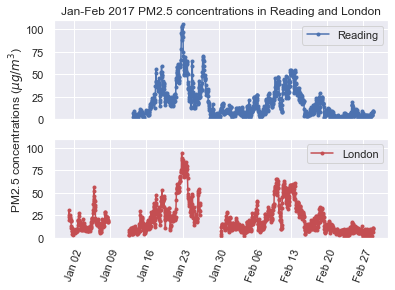

In [43]:
fig, ax = plt.subplots(2,1, sharex='all')                     # defining the name of our plot (fig) and the numerb of subplots (in this case 2 plots in the vertical and 1 horizontal
# defining what time interval we want to plot, marker type, marker size, color and line style
ax[0].plot(df.loc['2017-01':'2017-02', 'Concentration'], marker='o', markersize=3, color='b', linestyle='-', label='Reading')     #df.loc can be used to select specific dates in your dataframe
ax[1].plot(df2.loc['2017-01':'2017-02', 'Concentration'], marker='o', markersize=3, color='r', linestyle='-', label='London')    # ax[1] is the second subplot. So all statements related to your second subplot need this argument.
# set the y-as limits and number of ticks for both plots:
ax[0].set_ylim([0,110])
ax[1].set_ylim([0,110])
ax[0].yaxis.set_ticks(np.arange(0, 110, 25))
ax[1].yaxis.set_ticks(np.arange(0, 110, 25))
# set labels and title of plot and add a legend to both plots:
ax[0].set_ylabel('PM2.5 concentrations ($\mu g / m^3$)')
ax[0].yaxis.set_label_coords(-0.08, -0.1) 
ax[0].set_title('Jan-Feb 2017 PM2.5 concentrations in Reading and London')
ax[0].legend()   # this will use the label we defined in the .plot functions above
ax[1].legend()
# Set x-axis major ticks to weekly interval, on Mondays
ax[0].xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax[1].xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));
# rotating the x-axis labels by 70 degrees
ax[1].tick_params(axis='x', rotation=70)

## Plotting a world map

The two datasets are pretty similar. Maybe this has to do with the fact that they are relatively close to eachother. To check this, we can plot the stations locations on a map. The example below shows both station locations of a map over the UK. If you want to have more examples, look here https://scitools.org.uk/cartopy/docs/latest/gallery/index.html

In [44]:
#defining the locations on the map we want to plot first. Using the stationcode in the df files, we looked up the location of the stations 
#in the metdata datafile "PanEuropean_metadata.csv" found in the AQ folder:
Reading = dict(lon=-0.94407, lat=51.453)
London = dict(lon=0.07076, lat=51.453)
lons = [Reading['lon'], London['lon']]
lats = [Reading['lat'], London['lat']]

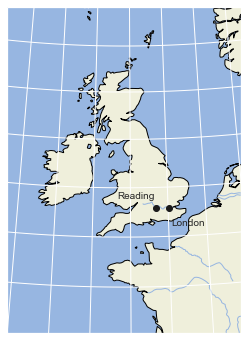

In [45]:
# defining the centre of the map we want to plot
extent = [-12, 5, 45, 62]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

# setting up the figure projection
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)
ax.plot(lons,lats, marker='o', color='k', transform=ccrs.Geodetic(), linestyle='')    
# the transform= argument in the above code line is needed to convert the lat-lon coordinate to the corresponding lat-lon location on the map

#Add station names as label to the plot
plt.text(Reading['lon'] - 0.1, Reading['lat'] + 0.5, 'Reading',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(London['lon'] + 0.1, London['lat'] - 0.9, 'London',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

# add features like rivers, ocean, lakes
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
# add grid lines to the plot
ax.gridlines()

## Saving the figure

Now that we have some experience making figures, we want to be able save them so that we can add them to our thesis, papers, presentations, blog etc...

Before we show you how to save a figure, we first have to discuss two different types of save files (vector and raster images). Depending on your needs, you will have to pick the one that is most suitable for you. Lets start by describing the two:

#### Raster images

Raster images, as the name suggests, defines a grid (raster) and uses many colored pixels to form a complete image. JPEGs, GIFs and PNGs are common raster image types. Almost all of the photos found on the web and in print catalogs are raster images.
Because raster images are constructed using a fixed number of colored pixels (Pixels per inch, also abbreviated as DPI), they can’t be dramatically resized without compromising their resolution. When stretched to fit a space they weren’t designed to fill, their pixels become visibly grainy and the image distorts. Therefore, it is important that you save raster files at precisely the dimensions needed to eliminate possible complications and also make sure you use a high enough DPI (e.g. 300 DPI is minimum requirement for most journals nowadays).

#### Vector images

Vector images are created using mathematical formulas rather than a grid. Common vector file types like EPS, AI and PDF are excellent for creating graphics that frequently require resizing. As a result of the vectorisation of your image, there is no decrease in sharpness when you resize your figures. The disatvantage of using vector images, is that the size of your figures can become huge, especially when you start to plot world maps etc. Therefore there is always a tradeoff between quality and figure size. Also when saving raster images with a very high dpi will get huge very fast, so don't overdo your dpi! 

Now that we know this difference, let's give an example of both (the error is related to the transparency of the seaborn style and doesn't affect our plots):

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


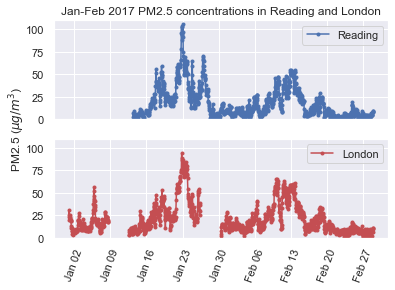

In [46]:
fig, ax = plt.subplots(2,1, sharex='all')                     # defining the name of our plot (fig) and the numerb of subplots (in this case 2 plots in the vertical and 1 horizontal
# defining what time interval we want to plot, marker type, marker size, color and line style
ax[0].plot(df.loc['2017-01':'2017-02', 'Concentration'], marker='o', markersize=3, color='b', linestyle='-', label='Reading')     #df.loc can be used to select specific dates in your dataframe
ax[1].plot(df2.loc['2017-01':'2017-02', 'Concentration'], marker='o', markersize=3, color='r', linestyle='-', label='London')    # ax[1] is the second subplot. So all statements related to your second subplot need this argument.
# set the y-as limits and number of ticks:
ax[0].set_ylim([0,110])
ax[1].set_ylim([0,110])
ax[0].yaxis.set_ticks(np.arange(0, 110, 25))
ax[1].yaxis.set_ticks(np.arange(0, 110, 25))
# set labels and title of plot and add a legend to both plots:
ax[0].set_ylabel('PM2.5 ($\mu g / m^3$)')
ax[0].yaxis.set_label_coords(-0.08, -0.1) 
ax[0].set_title('Jan-Feb 2017 PM2.5 concentrations in Reading and London')
ax[0].legend()
ax[1].legend()
# Set x-axis major ticks to weekly interval, on Mondays
ax[0].xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax[1].xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));
# rotating the x-axis labels by 45 degrees
ax[1].tick_params(axis='x', rotation=70)
plt.savefig('PM25.png', bbox_inches='tight', dpi=300)            # saving the figure as .png  
plt.savefig('PM25_low.png', bbox_inches='tight', dpi=50)         # saving the figure as low quality .png  
plt.savefig('PM25.eps', format='eps')                            # saving the figure as .eps

When you now check the folder you are currently working in, you will see the 3 saved files. As example I also created a low resolution PM25_low.png file, to show you how important it is too have high quality figures! Try to make the PM25_low.png file the size of your screen and see if you can still read the labels.

Note also that the some labels on the correct plots are still pretty small. Especially when you want to present these results to anyone in a presentation or poster, it is very important that you can actually read all the labels and titles. Therefore I suggest that you always make 2 versions of each plot. One where you use the standard fontsizes for your thesis or paper and another one where you increase the fontsize to at least 18 for your poster/presentation. You can specify it for each label seperately, or in the case where you use seaborne, you can scale all axes by a factor 1.5 (as is done in the example below):

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


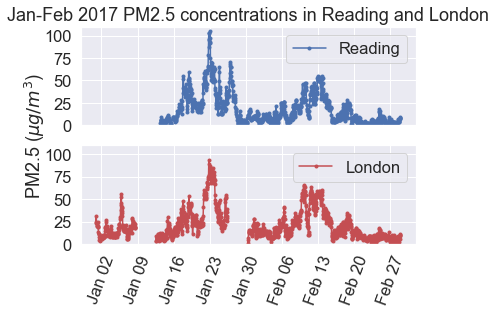

In [47]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(2,1, sharex='all')                     # defining the name of our plot (fig) and the numerb of subplots (in this case 2 plots in the vertical and 1 horizontal
# defining what time interval we want to plot, marker type, marker size, color and line style
ax[0].plot(df.loc['2017-01':'2017-02', 'Concentration'], marker='o', markersize=3, color='b', linestyle='-', label='Reading')     #df.loc can be used to select specific dates in your dataframe
ax[1].plot(df2.loc['2017-01':'2017-02', 'Concentration'], marker='o', markersize=3, color='r', linestyle='-', label='London')    # ax[1] is the second subplot. So all statements related to your second subplot need this argument.
# set the y-as limits and number of ticks:
ax[0].set_ylim([0,110])
ax[1].set_ylim([0,110])
ax[0].yaxis.set_ticks(np.arange(0, 110, 25))
ax[1].yaxis.set_ticks(np.arange(0, 110, 25))
# set labels and title of plot and add a legend to both plots:
ax[0].set_ylabel('PM2.5 ($\mu g / m^3$)')
ax[0].yaxis.set_label_coords(-0.1, -0.1) 
ax[0].set_title('Jan-Feb 2017 PM2.5 concentrations in Reading and London')
ax[0].legend()
ax[1].legend()
# Set x-axis major ticks to weekly interval, on Mondays
ax[0].xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax[1].xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));
# rotating the x-axis labels by 45 degrees
ax[1].tick_params(axis='x', rotation=70)
plt.savefig('PM25_poster.png', bbox_inches='tight', dpi=300)            # saving the figure as png   
plt.savefig('PM25_poster.eps', format='eps')                            # saving the figure as eps

## Point of caution !
Now re-run the first block of code in this section. As you will notice, it also changed the fontsize of this figure to the larger size. This is because the program remembers what you evaluated in the code block above (i.e. fontsize times 1.5 is still saved as the current setting in the Kernel). As a result, if you rerun a previous block of code, you will get a different outcome as before. This is just a simple example why it is important to keep an eye on what you define throughout your code. Maybe you have assigned a value to a variable a=1 at the top of the document and then reassign a different value halfway through (i.e. a=10). If you go back to the start again, the program will use the last assigned value (a=10) and so your results will be completely different! If in doubt (e.g. you defined something and deleted the statement from the program, but it is still in the iPhyton memory), restart the Kernel and run through the entire code from the start. 

## Doing some basic statistics on the datasets

In this section we start to calculate some statistics for the datasets. Let us start by calculating the mean PM2.5 concentration during the entire year for both datasets:

In [48]:
df["Concentration"].mean(skipna=False)

nan

This example shows us the importance of adding some information how to deal with empty elements in our array. If we keep them in our calculations, the results will be 'not a number' (nan) (i.e. how do you average over something that is empty). Therefore you should add skipna=True as argument to your statement. Doing this, we get:

In [49]:
Reading_mean=df["Concentration"].mean(skipna=True)
London_mean=df2["Concentration"].mean(skipna=True)

In [50]:
print("Reading mean concentration PM2.5 :", Reading_mean)
print("London mean concentration PM2.5 :", London_mean)

Reading mean concentration PM2.5 : 9.668547400727517
London mean concentration PM2.5 : 12.426665795501043


Maybe we only want to calculate the mean during the first 2 months:

In [51]:
df.loc['2017-01':'2017-02', 'Concentration'].mean(skipna=True)   # average for Reading during jan and feb

17.965395092052677

We can also calculate the monthly means:

In [52]:
for i in range(12):       # for-loop to calculate the mean for each month individually
    print('for', calendar.month_abbr[i+1], 'the average PM2.5 is', df["Concentration"][df.index.month == i+1].mean(skipna=True))

for Jan the average PM2.5 is 25.1214780565358
for Feb the average PM2.5 is 13.326796403997005
for Mar the average PM2.5 is 10.33905405083784
for Apr the average PM2.5 is 10.273333329791667
for May the average PM2.5 is 10.255929915552562
for Jun the average PM2.5 is 8.810555551944445
for Jul the average PM2.5 is 5.833731339283583
for Aug the average PM2.5 is 6.872274558734859
for Sep the average PM2.5 is 7.7003322222757475
for Oct the average PM2.5 is 7.4715846954234975
for Nov the average PM2.5 is 9.460906511827195
for Dec the average PM2.5 is 6.520684928136986


or calculate daily means in January to check for a possible difference between week days and weekends:

In [53]:
df_jan=df.loc['2017-01':'2017-01']  # selecting a subset of the original dataframe

for i in range(7):       # for-loop to calculate the mean for each day of the week individually (0=Monday, 6=Sunday)
    print('for', calendar.day_abbr[i], 'the average PM2.5 is', df_jan["Concentration"][df_jan.index.dayofweek == i].mean(skipna=True))

for Mon the average PM2.5 is 28.28194444152778
for Tue the average PM2.5 is 22.529999996285714
for Wed the average PM2.5 is 28.977083330625003
for Thu the average PM2.5 is 33.6354166625
for Fri the average PM2.5 is 26.38965516862069
for Sat the average PM2.5 is 14.165277774583334
for Sun the average PM2.5 is 26.281538457384613


Another thing we can calculate are some generic statistics:

In [54]:
df["Concentration"].describe()

count    8206.000000
mean        9.668547
std         9.841450
min        -2.800000
25%         4.000000
50%         6.600000
75%        11.300000
max       105.400000
Name: Concentration, dtype: float64

Maybe we don't understand what these variables show us (e.g. what does 25% mean?). To get some help to understand this, we can use the help function:

In [55]:
help(df.describe)

Help on method describe in module pandas.core.generic:

describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False) -> ~FrameOrSeries method of pandas.core.frame.DataFrame instance
    Generate descriptive statistics.
    
    Descriptive statistics include those that summarize the central
    tendency, dispersion and shape of a
    dataset's distribution, excluding ``NaN`` values.
    
    Analyzes both numeric and object series, as well
    as ``DataFrame`` column sets of mixed data types. The output
    will vary depending on what is provided. Refer to the notes
    below for more detail.
    
    Parameters
    ----------
    percentiles : list-like of numbers, optional
        The percentiles to include in the output. All should
        fall between 0 and 1. The default is
        ``[.25, .5, .75]``, which returns the 25th, 50th, and
        75th percentiles.
    include : 'all', list-like of dtypes or None (default), optional
        A white list of data typ

You can use this for many other functions and is very useful if for example you want to know how to do a specific calculation (e.g. median of your dataframe):

In [56]:
help(df.median)

Help on method median in module pandas.core.frame:

median(axis=None, skipna=None, level=None, numeric_only=None, **kwargs) method of pandas.core.frame.DataFrame instance
    Return the median of the values for the requested axis.
    
    Parameters
    ----------
    axis : {index (0), columns (1)}
        Axis for the function to be applied on.
    skipna : bool, default True
        Exclude NA/null values when computing the result.
    level : int or level name, default None
        If the axis is a MultiIndex (hierarchical), count along a
        particular level, collapsing into a Series.
    numeric_only : bool, default None
        Include only float, int, boolean columns. If None, will attempt to use
        everything, then use only numeric data. Not implemented for Series.
    **kwargs
        Additional keyword arguments to be passed to the function.
    
    Returns
    -------
    Series or DataFrame (if level specified)

